# OPTIMIZATION METHODS IN STRUCTURAL ENGINEERS

Optimizations in structural engineering offer several advantages that can significantly enhance the design, construction, and performance of structures. Overall, optimization techniques empower structural engineers to achieve cost-effective, sustainable, and high-performing structures that meet safety requirements while maximizing resource efficiency. 


In recent years, some optimization methods that are conceptually different from the tra- ditional mathematical programming techniques have been developed such as Genetic algorithms, Simulated annealing, Particle swarm optimization, Ant colony optimization, Fuzzy optimization, Neural-network-based methods,... These methods are labeled as modern or nontraditional methods of optimization.

In this topic we will discuss two following methods:
1. Genetic algorithms
2. Neural-network-based methods

Genetic algorithms are optimization techniques inspired by the process of natural selection and genetics. They are used to find optimal solutions to complex problems by simulating the principles of evolution and genetic recombination (initialization, evaluation, selection, reproduction, replacement, termination).

Neural network-based methods, often referred to as neural networks or artificial neural networks, are computational models inspired by the structure and functioning of biological brains. They consist of interconnected nodes, called neurons, organized in layers that process and transmit information. Neural network-based methods offer several advantages, including their ability to learn complex patterns from large datasets, adaptability to different problem domains, and the potential for parallel processing. However, they may require extensive computational resources, significant training data, and careful.


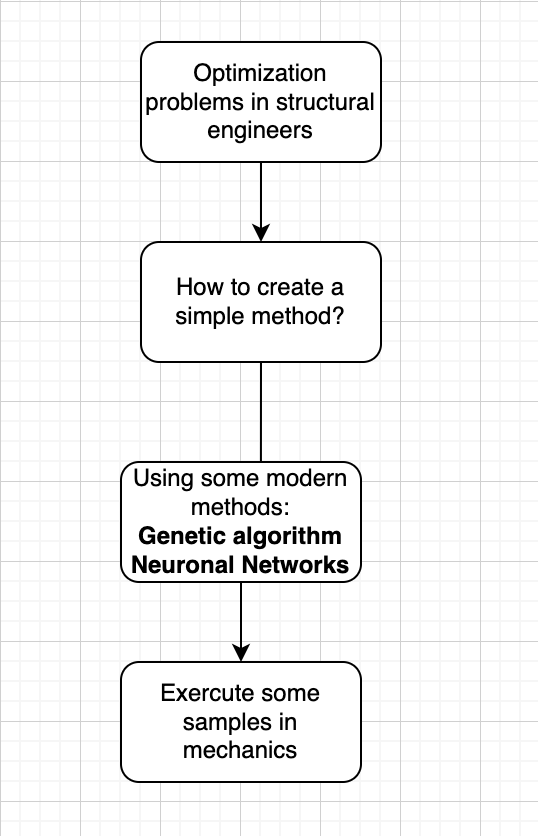


## Problems in structural engineers

The general problem in structural engineers is to find a set of variables $\bf{X}$ $=\{x_1, x_2,...,x_n\}^T$ which minimines the objective function $f(\bf{X})$ that satisfy constraints: 

    $g_1(\bf{X})$= $\alpha$
    
    $$g_2(\bf{X})\leq \beta$$
    
    $$g_3(\bf{X})\geq \eta$$



## Create a simple optimization method

In [1]:
# This is a sample Python script.
import random

# define an objective function
# In this method, we find solution (x,y,z) that makes function f(x,y,z)=0

def OF(x,y,z):
    return 6*x**3+9*y**2+90*z-25

# fitness function (the minimum error makes the fitness function maximized)
def fitness(x,y,z):
    ans=OF(x,y,z)

    if ans==0:
        return 99999
    else:
        return abs(1/ans)

# Generate solutions: get 1000 random solutions then check which one return the minimum error 
solutions=[]
for s in range(1000):
    solutions.append((random.uniform(0,10000),
                      random.uniform(0,10000),
                      random.uniform(0,10000)))

# save the best solutions in one list    
for i in range(10000):
    ranksolutions=[]
    for s in solutions:
        ranksolutions.append((fitness(s[0],s[1],s[2]),s))
    ranksolutions.sort()
    ranksolutions.reverse()

    #print(f"=== Gen {i} best solutions ===")
    #print(ranksolutions[0])
    if ranksolutions[0][0]>9999:
        break
    # chose 100 best solutions and genberate again 
    bestsolutions=ranksolutions[:100]

    elements=[]
    for s in bestsolutions:
        elements.append(s[1][0])
        elements.append(s[1][1])
        elements.append(s[1][2])

    newGen=[]
    for _ in range(1000):
        e1=random.choice(elements)*random.uniform(0.99,1.01)
        e2 = random.choice(elements)*random.uniform(0.99,1.01)
        e3 = random.choice(elements)*random.uniform(0.99,1.01)

        newGen.append((e1,e2,e3))
    solutions=newGen



# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print(f" The fitness value is {ranksolutions[0][0]}")
    s=ranksolutions[0][1]
    print(f"The best solution is {s}")
    ans=OF(s[0],s[1],s[2])
    print(f"The error of the method {abs(ans)}")


 The fitness value is 34291.90749312615
The best solution is (0.2840828418402834, 0.27138872977140455, 0.2688838458360681)
The error of the method 2.9161399091037765e-05


## Genetic Algorithm Methods
The package was developed by Ryan Solgi:
https://pypi.org/project/geneticalgorithm/



In [2]:
#!pip install geneticalgorithm

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga


### Optimized function with constraints

Now consider that we want to minimize f(X)=x1+x2+x3 where X is a set of real variables in [0,10]. Also we have an extra constraint so that sum of x1 and x2 is equal or greater than 2. The minimum of f(X) is 2. In such a case, a trick is to define penalty function.

 The best solution found:                                                                           
 [0.55386676 1.44738458 0.00229871]

 Objective function:
 2.0035500575327205


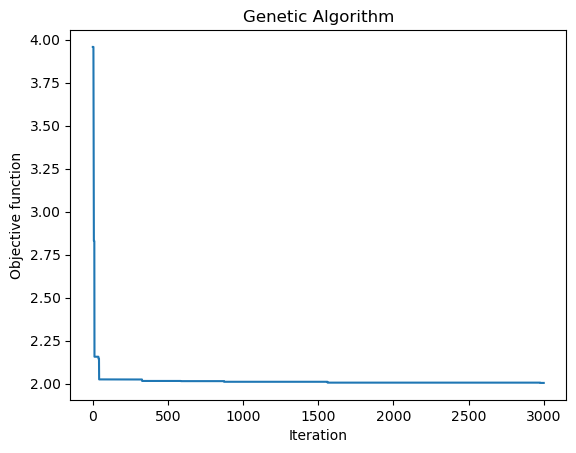

In [4]:

# Optimized function with constraints

def OF(X):
    x1,x2,x3=X
    pen=0
    if x1+x2<2:
        pen=30+1000*(2-x1-x2)
    return np.sum(X)+pen



def f(X):
    pen = 0
    if X[0] + X[1] < 2:
        pen = 500 + 1000 * (2 - X[0] - X[1])
    return np.sum(X) + pen


varbound = np.array([[0, 10]] * 3)




algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, \
           dimension=3, \
           variable_type='real', \
           variable_boundaries=varbound, \
           algorithm_parameters=algorithm_param)

model.run()

http://infinity77.net/global_optimization/test_functions_nd_W.html

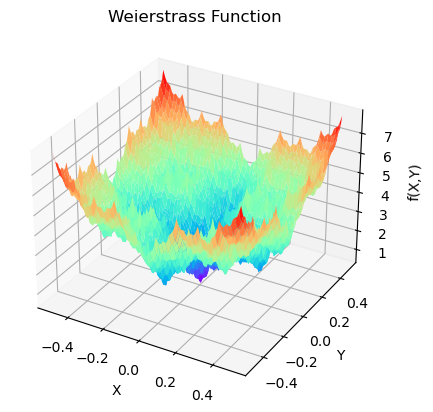

In [5]:
"""
http://infinity77.net/global_optimization/test_functions_nd_W.html
"""
#Weierstrass Function_______________________________________

def f(X):
    dim = len(X)

    a = 0.5
    b = 3
    OF = 0
    for i in range(0, dim):
        t1 = 0
        for k in range(0, 21):
            t1 += (a ** k) * math.cos((2 * math.pi * (b ** k)) * (X[i] + 0.5))
        OF += t1
    t2 = 0
    for k in range(0, 21):
        t2 += (a ** k) * math.cos(math.pi * (b ** k))
    OF -= dim * t2

    return OF


varbound = np.array([[-0.5, 0.5]] * 2)

algorithm_param = {'max_num_iteration': 1000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=f, dimension=2, \
           variable_type='real', \
           variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)


#Plot
# Generate data points
x = np.linspace(-0.5, 0.5, 100)
y = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = f([X[i][j], Y[i][j]])

# Plot the function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='rainbow')


# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.set_title('Weierstrass Function')

# Show the plot
plt.show()




 The best solution found:                                                                           
 [-5.96936504e-06 -5.82016547e-05]

 Objective function:
 0.01624493294757201


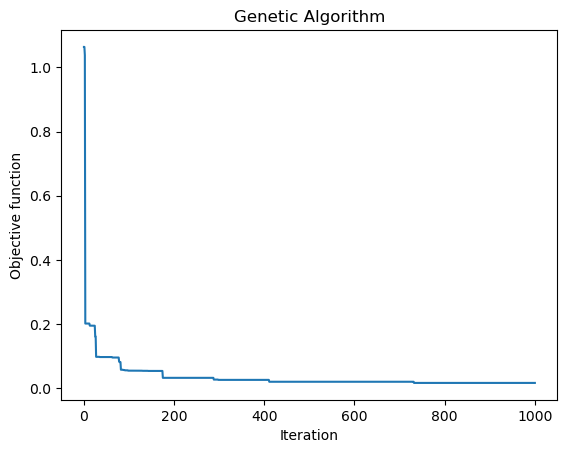

In [6]:
model.run()

 The best solution found:                                                                           
 [0.50508139 1.49715747 0.00334068]

 Objective function:
 2.0055795429725993


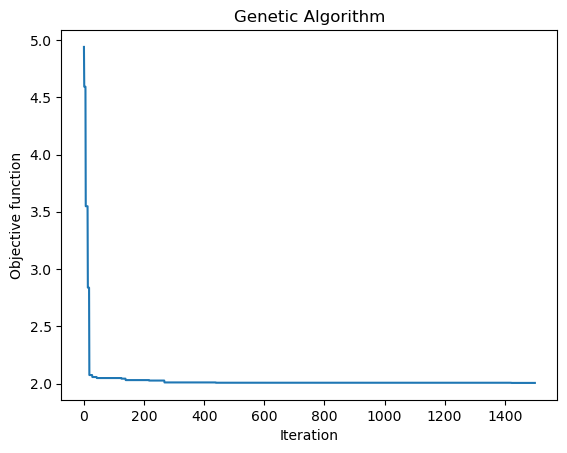

In [9]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    pen=0
    if X[0]+X[1]<2:
        pen=500+1000*(2-X[0]-X[1])
    return np.sum(X)+pen
    
varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound)

model.run()

In [10]:
X=[0.73962353, 1.26054321, 0.00478025]

In [11]:
f(X)

2.00494699

In [12]:
X[0]+X[1]

2.00016674

https://es.mathworks.com/help/gads/constrained-minimization-using-ga.html#gaconstrained-2

 The best solution found:                                                                           
 [ 0.81202819 12.31484392]

 Objective function:
 91402.61655242425


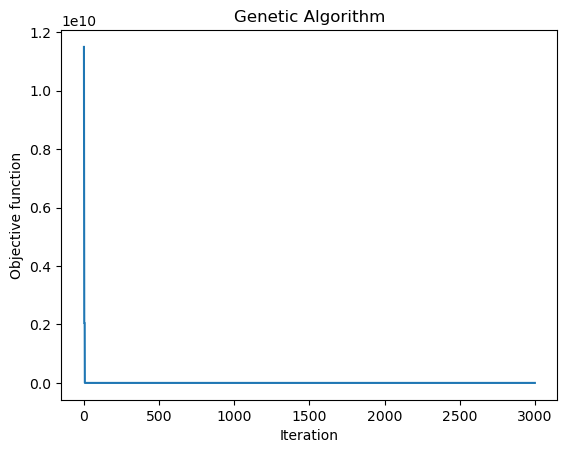

Best Solution: [ 0.81202819 12.31484392]
Best Fitness: 91402.61655242425


In [15]:
def simple_objective(x):
    x1 = x[0]
    x2 = x[1]
    y = (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

    # Penalty terms for constraints
    penalty = 0.0
    c = [1.5 + x1 * x2 + x1 - x2, -x1 * x2 + 10]
    for constraint in c:
        if constraint > 0:
            penalty +=1e10*constraint

    return y + penalty

varbound = np.array([[0, 1], [0, 13]])
algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.2, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=simple_objective, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

best_solution = model.best_variable
best_fitness = model.best_function

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

In [16]:
x=[0.8122,   12.3103]

In [17]:
simple_objective(x)

19091267.35771647

In [18]:
 x=[ 0.81212559, 12.31337101]

In [19]:
simple_objective(x)

91358.75666894522

In [20]:
x1,x2=x
c = [1.5 + x1 * x2 + x1 - x2, -x1 * x2 + 10]
c

[-0.0012417236148554167, -3.696385144635883e-06]

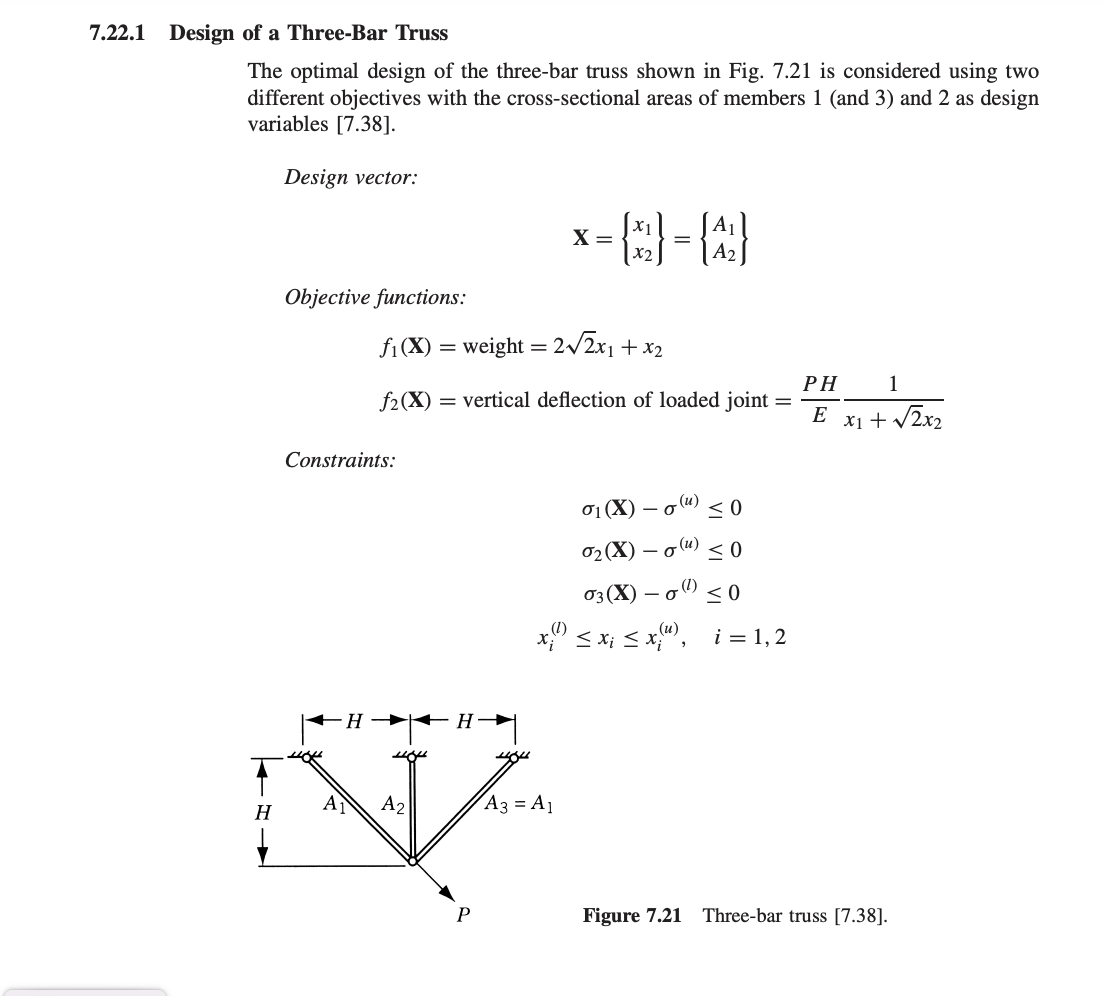

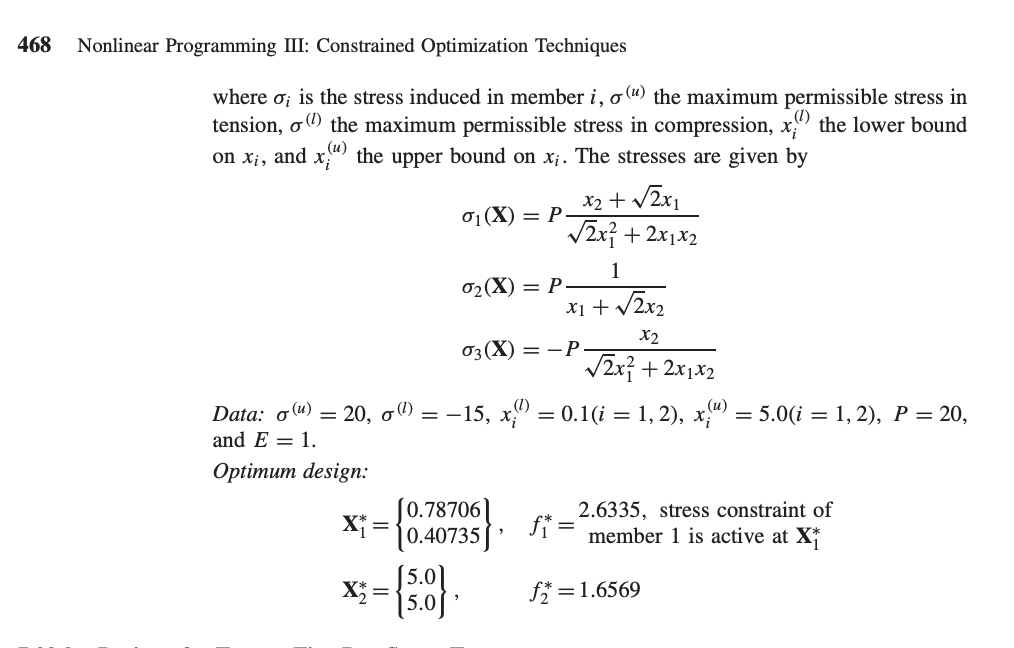

 The best solution found:                                                                           
 [0.57001419 2.47561236]

 Objective function:
 4.087855956437485


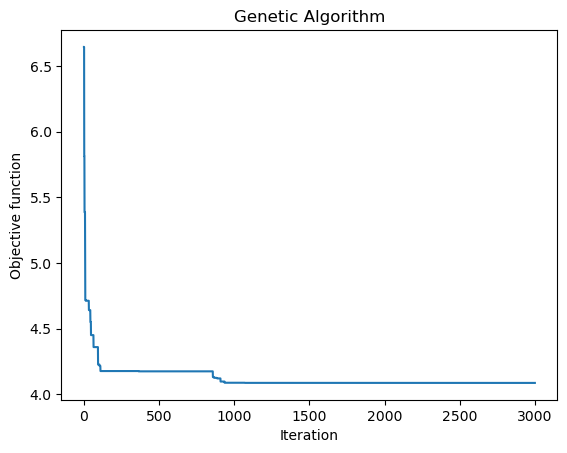

In [21]:
# Define the constants and bounds
sigma_u = 20
sigma_l = -15
x_l = 0.1
x_u = 5.0
P = 20
E = 1

# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1=P * (x2 + np.sqrt(2) * x1) / (np.sqrt(2) * x1**2 + 2 * x1 * x2) - sigma_u
    c2=P / (x1 + np.sqrt(2) * x2) - sigma_u
    c3=-P * x2 / (np.sqrt(2) * x1**2 + 2 * x1 * x2) - sigma_l
    return [c1,c2,c3]
    

# Define the Objective Function
def OF(X):
    x1, x2 = X
    y=2 * np.sqrt(2) * x1 + x2
    penalty = 0.0
    
    for constraint in constraints(X):
        if constraint > 0:
            penalty +=1e20*constraint

    return y + penalty

# Define the optimization problem
varbound = np.array([[0.1, 5.0]]*2)


algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 100, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()


In [22]:
x=[0.5703666, 2.46286331]

In [23]:
constraints(x)

[-0.00034049937624658355, -15.065847858102252, -0.06550735872600555]

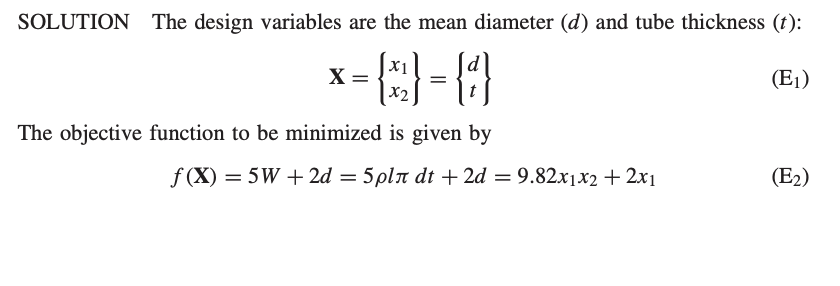
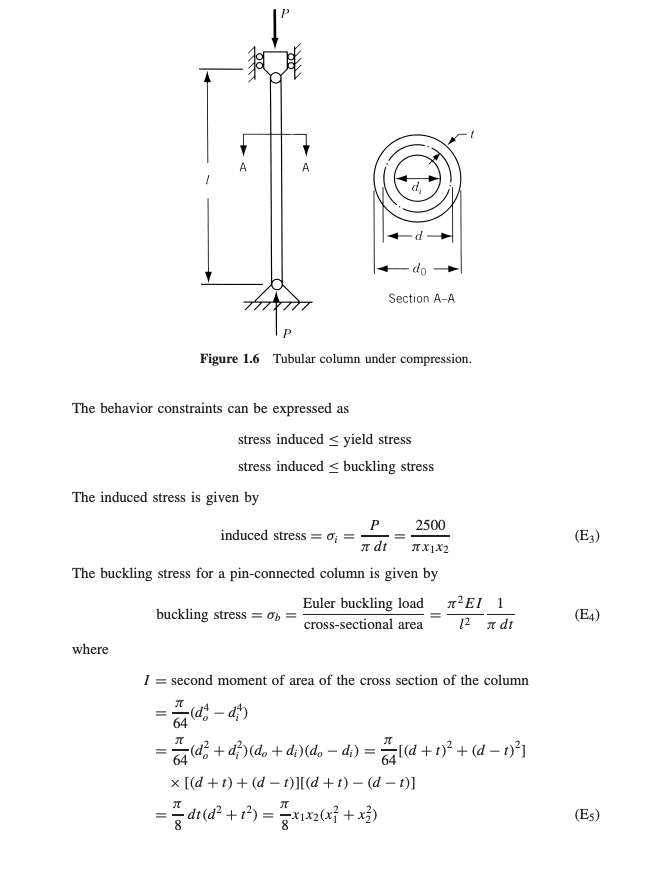
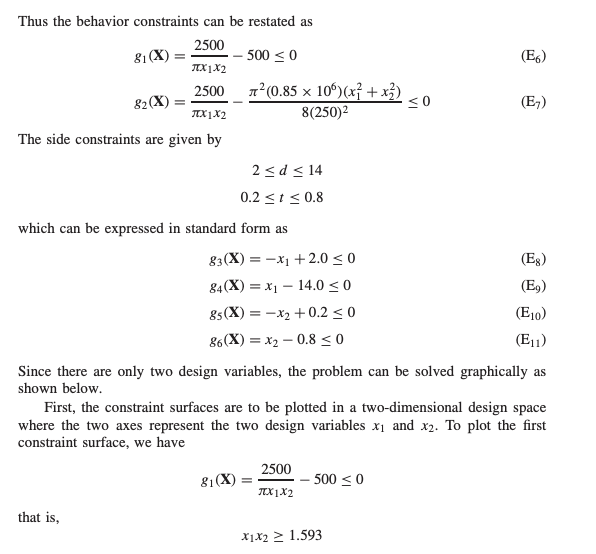
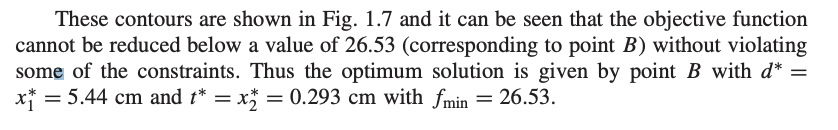

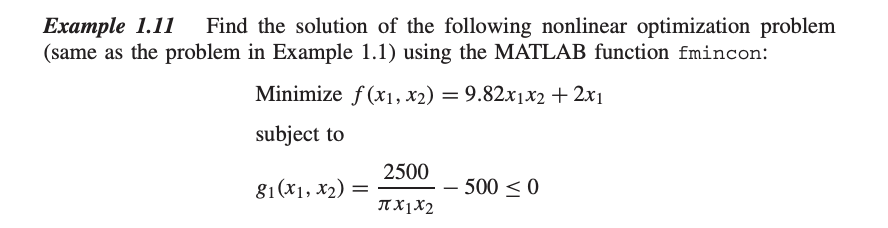

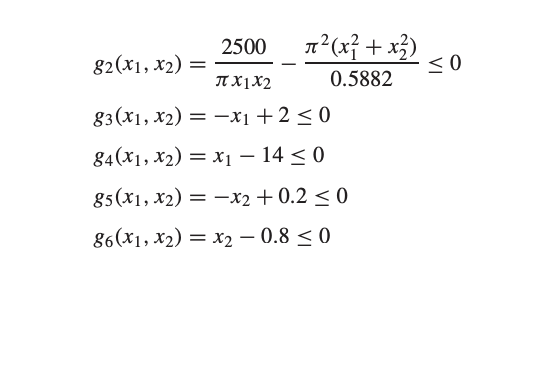

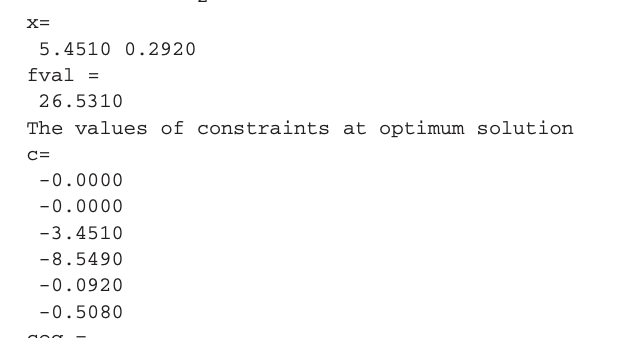

 The best solution found:                                                                           
 [5.45215208 0.29195511]

 Objective function:
 26.53561984795799


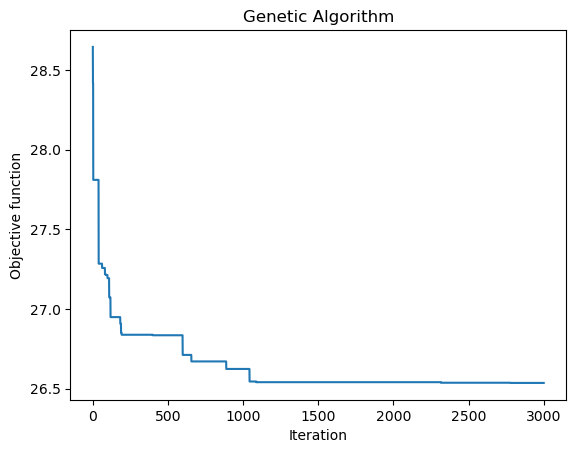

In [24]:
# Define the Constraint Functions
def constraints(X):
    x1, x2 = X
    c1=2500/(np.pi*x1*x2)-500
    c2=2500/(np.pi*x1*x2)-np.pi**2*(x1**2+x2**2)/0.5882
    
    return [c1,c2]
    

# Define the Objective Function
def OF(X):
    x1, x2 = X
    y=9.82*x1*x2+2*x1
    penalty = 0.0
    
    for constraint in constraints(X):
        if constraint > 0:
            penalty +=10000+1e20*constraint

    return y + penalty

# Define the optimization problem
varbound = np.array([[2, 14],[0.2,0.8]])


algorithm_param = {'max_num_iteration': 3000, \
                   'population_size': 200, \
                   'mutation_probability': 0.1, \
                   'elit_ratio': 0.01, \
                   'crossover_probability': 0.5, \
                   'parents_portion': 0.3, \
                   'crossover_type': 'uniform', \
                   'max_iteration_without_improv': None}

model = ga(function=OF, dimension=2, variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()
